# COMP1008 2024/25 Coursework - Wine Quality Prediction with Machine Learning

#### **Student Name**: Jonathan Nwebube
#### **Student ID**: 20554142

## Task description

**Main Task**: Utilizing the provided Red Wine Quality dataset, build a Linear Regression Model and another Machine Learning Model of your choice to predict wine quality. Employ appropriate methods from the `pandas`, `matplotlib`, and `sklearn` libraries to analyze and process the dataset for building predictive models.



**Format**: Use this Jupyter Notebook as a template to write your report in `Markdown` cells, supported by your source code in Code cells. Ensure your code produces the corresponding plots or results addressing the questions. Rename this .ipynb file to `202425_COMP1008_cw_XXX.ipynb`, where XXX is your username (e.g., psxyz), and submit it to Moodle by <b><font color = "red">24 March, 3pm</font></b>.

**Marks**: The coursework is worth a total of 100 marks (accounting for 25% of the COMP1008 module grade). Marks will be awarded based on your understanding of machine learning theories, the informativeness and presentation of your code, visualizations, results (e.g., code comments, necessary labels in plots), self-learning ability in solving the specific problem, as well as, how succinct, concise, and clear is your report writing.

Please check the detailed instructions at the end of this template file.

<div class="alert alert-success" style="text-align:left;">
<h2>Question 1. Prediction Model 1 - Linear Regression Model<span style="float:right;">[50 marks]</span></h2></div>

#### Question 1a <span style="color:red">(5 marks)</span> 
**TASK**: Briefly explain why the Red Wine Quality dataset is suitable for linear regression analysis.
- Identify at least 3 characteristics that make this dataset appropriate for regression.
- Use 3 bullet points (one for each characteristics) to present your answer concisely.
- Your explanation should reflect your understanding of the linear regression model.

<b>Q1a Answer</b>: Your answer here

- **All columns are numerical:**
    - The dataset in the csv file consists of numbers, necessary for linear regression
    - Linear regression works well when relationships between variables are linear



  
- **Continous target value/wine quality score:**
    - continous numerical value ranging from 1 to 10, allowing linear regression to predict continous outcomes


  
- **Linear relationships:**
    - 11 input variables such as fixed and volatile acidity, alcohol and density that can have linear relationships with the wine quality with linear regression models assuming these relationships exist 

#### Question 1b <span style="color:red">(15 marks)</span>

**TASK**: Analyze the dataset using appropriate methods from the `pandas` and/or `matplotlib` libraries. 
- Identify potential issues with the current dataset, specify which part(s) of the dataset are affected. Explain what could go wrong if the data is not properly pre-processed.
- Provide at least 2 short-code solutions demonstrating how you analyze these issues.  
- Briefly explain how each code snippet helps evaluate data quality issues.


<b>Q1b answer</b>: Your answer here

**Potential Issues with the current dataset**


- **Missing values** are a potential issue because missing values in a dataset could lead to incorrect model training as linear regression cannot process null values and could also lead to the misleading analysis of wine quality
  
- **Outliers** can skewer predictions and affect the accuracy of the linear regression model as it is sensitive to values

- **Non-linear**: if the data in the datasets have non-linear relationships, then the linear regression model won't be accurate

- **Collinearity** can be a potential issue with the current dataset when multiple columns are highly correlated. If not properly pre-processed it can be difficult to determine the individual effects on the wine quality

In [9]:
#snippet for missing values
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('winequality-red.csv')

print("The number of values missing in each column:\n ")
print(df.isnull().sum())

The number of values missing in each column:
 
fixed acidity             0
volatile acidity          0
citric acid               0
residual sugar            0
chlorides                 0
free sulfur dioxide     187
total sulfur dioxide      0
density                  91
pH                       19
sulphates                 0
alcohol                   0
quality                   0
dtype: int64


The snippet of code above highlights **missing values** and helps evaluate data quality issues because the detection of missing values allows the option to carry out a suitable response such as dropping the rows to try and maintai correct relationships. 

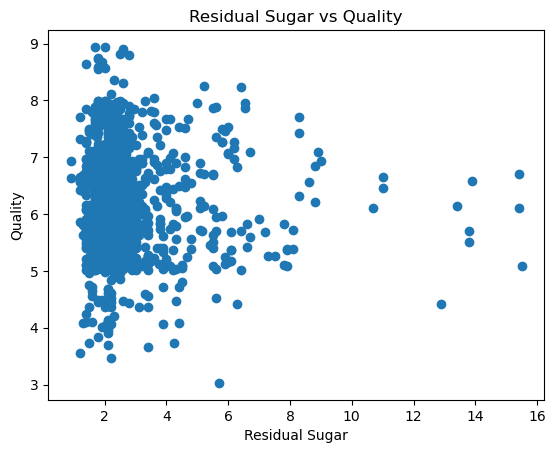

In [11]:
#snippet for outliers and linear relations
plt.scatter(df['residual sugar'], df['quality'])
plt.xlabel('Residual Sugar')
plt.ylabel('Quality')
plt.title('Residual Sugar vs Quality')
plt.show()

The snippet of code above is a scatter graph which can help identify **outliers** in one of the datasets input columns by plotting it against the quality of wine as thats the target variable. 

This is an example for one column, it being the *"residual sugar"* column, however this could be done for all columns
- The points that are far away from the majority of points can indicate annomalies and errors which may affect model performance
- This also doubles up as it will also show if the relationship is linear or **non-linear**

In [13]:
correlation = df.corr()
print("Correlation between 'pH' and 'fixed acidity':")
print(df['pH'].corr(df['fixed acidity']),"\n")

print("Correlation between 'density' and 'fixed acidity':")
print(df['density'].corr(df['fixed acidity']),"\n")

print("Correlation between 'citric acid' and 'fixed acidity':")
print(df['citric acid'].corr(df['fixed acidity']),"\n")

Correlation between 'pH' and 'fixed acidity':
-0.6818153034930989 

Correlation between 'density' and 'fixed acidity':
0.6755462571648037 

Correlation between 'citric acid' and 'fixed acidity':
0.6717034347641059 



The code snippet above finds the correlation between all the numbers in the two selected columns. This can help evaluate whether some variables are overlapping and are collinearity. 
- If the correlation is above 0.7 then it is considered to be highly correlated, which allows further action to take place

#### Question 1c <span style="color:red">(20 marks)</span>
**TASK**: Apply appropriate data preprocessing techniques to address the issues identified in Question 1b.
- Provide a code solution that resolves the identified data issue(s).
- Briefly explain the methods and parameters used in your solution. Ensure your explanation clearly justifies how these techniques improve data quality and suitability for analysis.


<b>Q1c answer</b>: 

In [17]:
#Fixing missing values
df.fillna(df.mean(), inplace=True)

#Fixing outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

#Fixing collinearity
df.drop(columns=['fixed acidity'], inplace=True)


**Fixing missing values**
- To fix missing values, the code replaces the missing values with the column average which ensures the dataset is complete and won't cause errors during model training.
    - Another possible option was to drop the rows with the missing columns, however dropping too many rows could result in a loss of valuable data.
    - In the specific case of the wine quality dataset, dropping the rows would not have been an issue as the most non-calues in a column was a small 187 out of over 1500 rows of data.
- The reason the values were replaced with the columns average is because the maximum number of rows that may have been dropped is 187+91+19 = 297 rows. This would be alot of rows increasing the risk of losing valuable data, which is why the mean is used instead

**Fixing outliers**
- To fix outliers, anomalies and extreme values are removed
- This is to prevent distortion of the regression coefficients and in turn increasing the models accuracy

**Fixing collinearity**
- To fix possible collinearity, fixed acidity column is dropped based on the correlation analysis
- It has strong correlations with three other variables being 'pH' (r=0.681), 'density' (r = 0.676) and 'citric acid' (r = 0.671) suggesting signs of collinearity with 0.7 being the threshold
- This resolution reduces redundancy and prevents distortion by correlated inputs
  


---

#### Question 1d <span style="color:red">(10 marks)</span>

**TASK**: Train and evaluate a Linear Regression model using the preprocessed dataset.   
- Print the model's weights.  
- Print the model's accuracy. 
    - Evaluate the model using at least three different metrics.
    - Briefly discuss the advantages of each metric in assessing model performance.


<b>Q1d answer</b>: 

In [22]:
##### Your code here
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

#pre-processing
min_max_scaler = preprocessing.MinMaxScaler() 
df_scaled = df.copy() 
df_scaled[df.columns] = min_max_scaler.fit_transform(df)
df_scaled.head()

#seperates input and output
df_output = df_scaled['quality']
df_input = df_scaled.drop(columns=['quality'])
df_input.head()

# preps training and testing dataset at 70:30
x_train, x_test, y_train, y_test = train_test_split(df_input, df_output, test_size = 0.3, random_state=1)

lr = LinearRegression()
lr.fit(x_train, y_train)

#preidction
y_pred = lr.predict(x_test)

#Model's weight
print("Model's weight:\n")
column_names = x_train.columns
coefficients = lr.coef_

for i in range(len(column_names)):
    column = column_names[i]
    coefficient = coefficients[i]
    print(f"{column}: {coefficient:.4f}")

#Evaluation model's performance
print("\nModel Performance:")
print("\nMean Absolute Error (MAE):", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", metrics.mean_squared_error(y_test, y_pred))
print("R² Score:", metrics.r2_score(y_test, y_pred))

Model's weight:

volatile acidity: -0.1168
citric acid: -0.0318
residual sugar: 0.0272
chlorides: -0.0142
free sulfur dioxide: 0.0183
total sulfur dioxide: -0.0796
density: -0.0145
pH: -0.1345
sulphates: 0.2313
alcohol: 0.2836

Model Performance:

Mean Absolute Error (MAE): 0.11031427385245623
Mean Squared Error (MSE): 0.019109866117136012
R² Score: 0.29580245165531494


**The advantages of each metric in assesing model performance**

**Mean Absolute Error (MAE):**  
- MAE measures the average size of the prediction errors using absolute values
- It is advantageous because it can give a clear interpretation of how much the predictions deviate from the actual values on average while being less sensitive to outliers due to the use of absolute values

**Mean Squared Error (MSE):**  
- MSE squares the error before averaging, giving more weight to larger errors making it useful for identifying models that are making large mistakes on certain predictions
  
**R² Score (Coefficient of Determination):**  
- The R² score measures how well the model explains the variance in the target variable
- Its advantegous as its easy to interpret:
  - A score of 1 means perfect prediction
  - A score of 0 means the model performs no better than predicting the mean
- It provides an overall indication of model fit

---

<div class="alert alert-success" style="text-align:left;"><h2>Question 2. Prediction Model 2<span style="float:right;">[20 marks]</span></h2></div>

#### Question 2a <span style="color:red">(10 marks)</span>

**TASK**: Build a different machine learning model for the same prediction task.
- Choose a model covered in the lectures or explain your choice of a different method. If you choose a different method, provide at at least two arguments to justify your choice compared to the ones covered in the lectures. 
- Specify which model you selected and why. 
- List the key parameters of your chosen model (Model 2).
- Provide a code implementation for the selected method.

<b>Q2a answer</b>: 

Selected Model: **Decision Tree Classifier**

I have chosen to use a Classification model, specifically the Decision Trees. The wine quality will be classified into three categories of Low, Medium or High

**Justification:**
 - **Interpretability:**  
  The decision tree model is easy to understand and visualise, making it ideal for explaining how feature inputs influence wine quality classification

- **Non-linear Capability:**  
  Decision trees can handle non-linear relationships between features, a potential subissue using linear regression where the assumption was features had a linear relationship

  Handling non-linear relationships improves the classification accuracy on complex datasets

**Target Transformation (classification:**
- Low quality: quality <= 5  
- Medium quality: quality == 6  
- High quality: quality >= 7  

**Key Parameters:**

- max_depth: Limits the depth of the tree to avoid overfitting
- min_samples_split: Minimum samples required to split a node  
- random_state = 1: Ensures consistent results on repeated runs by setting the seed for the random number

In [29]:
# Your code here
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

df_classification = df.copy()

def classify_quality(q):
    if q <= 5:
        return 'Low'
    elif q == 6:
        return 'Medium'
    else:
        return 'High'

df_classification['quality_class'] = df_classification['quality'].apply(classify_quality)

X = df_classification.drop(columns=['quality', 'quality_class'])
y = df_classification['quality_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

t_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=1)
t_model.fit(X_train, y_train)

y_predict = t_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))



Accuracy: 0.9568965517241379

Classification Report:
               precision    recall  f1-score   support

        High       0.98      0.98      0.98       336
         Low       0.50      0.33      0.40         9
      Medium       0.00      0.00      0.00         3

    accuracy                           0.96       348
   macro avg       0.49      0.44      0.46       348
weighted avg       0.96      0.96      0.96       348



### Question 2b <span style="color:red">(10 marks)</span>
**TASK**: Evaluate the performance of your new model and compare it to Prediction Model 1.
- Analyze whether the new model performs better or worse and explain why.
    - Base your evaluation on the same metrics used in Question 1d).
- Include one plot visually comparing the performance of both models.
- Provide a brief textual explanation interpreting the results.

<b>Q2b answer</b>: 

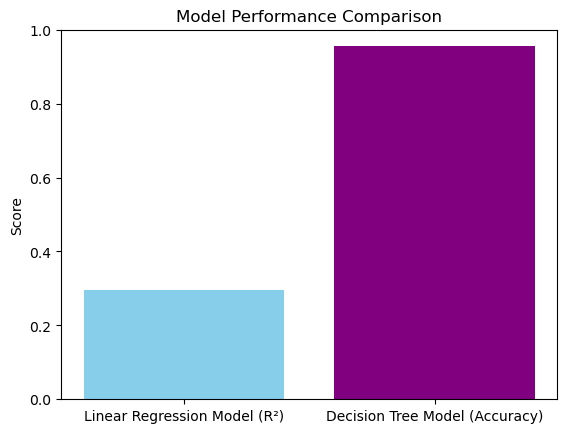

In [32]:
#visual plot of comparison of both models
labels = ['Linear Regression Model (R²)', 'Decision Tree Model (Accuracy)']
scores = [0.2958, 0.95686965517241379]

plt.bar(labels, scores, color=['skyblue', 'purple'])
plt.ylim(0, 1)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.show()

**Performance Comparison of Linear Regression and Decision Tree Classifier**
- The performance comparison shows that Linear Regression is evaluated using regression metrics (MAE, MSE, R²), while Decision Tree Classifier uses classification metrics (Accuracy, F1-score)

**Linear Regression:**
- Mean Absolute Error (MAE): **0.1180**
- Mean Squared Error (MSE): **0.0190**
- R² Score: **0.2958**

**Decision Tree Classifier:**
- Accuracy: **0.957**
- F1-score for majority class ("High"): **0.98**
- F1-score for "Low": **0.00**
- F1-score for "Medium": **0.00** 

**Comparison of R² with Accuracy**
- Model 1 predicts exact wine quality values, but with limited accuracy (R² = 0.30 (2.dp))
    - It explains about 30% of the variance in wine quality
- Model 2 simplifies the target into categories (High/Medium/Low) achieving very high accuracy (95.7%)
    -That however is partly because the majority of data points are in the “High” class
- Classification performance is biased toward the majority class, explaining why the F1-score for "Medium" and "Low" is 0.00

Interpreting the data has led me to believe that the decision tree model performs better than the linear regression tree in terms of raw accuracy. It may be more interpretable when classification into quality groups is needed, however I also believe that it may be less balanced due to class imbalances

The linear regression model provides a continuous prediction and may be more useful if specific quality scores are needed


---

<div class="alert alert-success" style="text-align:left;"><h2>Question 3. Comparison and Improvement<span style="float:right;">[30 marks]</span></h2></div>

#### Question 3a <span style="color:red">(15 marks)</span>
**TASK**: Analyze the impact of removing the least important feature from Prediction Model 1.
- Identify and remove the least important feature. 
- Retrain the Linear Regression model and evaluate its performance. 
- Compare the results before and after feature removal.
- Provide a code implementation and a justification explaining the impact on model performance.


<b>Q3a answer</b>:

In [38]:
df_no_chlorides = df_scaled.drop(columns=['chlorides'])

x_no_chlorides = df_no_chlorides.drop(columns=['quality'])
y = df_scaled['quality']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(x_no_chlorides, y, test_size=0.3, random_state=1)

lr_no_chlorides = LinearRegression()
lr_no_chlorides.fit(X_train_r, y_train_r)

y_prediction_r = lr_no_chlorides.predict(X_test_r)

print("\nPerformance after removing 'chlorides':")
print("MAE:", metrics.mean_absolute_error(y_test_r, y_prediction_r))
print("MSE:", metrics.mean_squared_error(y_test_r, y_prediction_r))
print("R²:", metrics.r2_score(y_test_r, y_prediction_r))



Performance after removing 'chlorides':
MAE: 0.11040099196974579
MSE: 0.019148768851816694
R²: 0.29436888795486216


**'chlorides'** has the smallest impact on the model with a coefficient of **-0.0142**, suggestsing that variations in chlorides had minimal influence on predicting wine quality

By removing this feature and retraining the model:
- We slightly simplified the model
- The performance didn't change much, confirming that 'chlorides' is not essential
- This supports the idea that feature selection can reduce complexity without distorting accuracy improving efficiency



---

#### Question 3b <span style="color:red">(15 marks)</span>
**TASK**: Based on your observations, suggest strategies for improving future models when predicting on new data.
- Discuss potential improvements. 

<b>Hint</b>: based on relevant analysis, feature selection, feature scaling and data processing (e.g. resolve imbalanced samples, errors and outliers, etc.) could all potentially improve the model by reducing training time, fixing overfitting and improving interpretability, etc. 
You can also explore external resources for other potential approaches or techniques.<br>

<b>Note</b>: Coding is optional here, but your answers should be supported by relevant analysis or justifications.

<b>Q3b answer</b>:

Based on the model evaluations and observations, the following strategies could help improve future models:

- **Better Class Balance**: The classification model showed poor performance for underrepresented classes ('Low' and 'Medium') so a strategy to improve the imbalanced samples could be by using **oversampling (SMOTE)** or class weighting may help the model learn minority classes better
    - This is a technique used to balance inbalanced datasets where a class has few examples compared to other classes
    - It can help improve the model's ability to generalise across all classes, with more oppurtunities to learn from the rare cases

- **Feature Engineering**: The creation of new features such as combining fixed acidity and volatile acidity values will allow the model to capture non-linear relationships

- **Outlier Handling**: Although outliers were removed with IQR filtering, additional analysis like Z-score filtering may handle them more effectively preventing outliers from skewing predictions in linear regression

- **Feature Selection Automation**: Using tools like **Recursive Feature Elimination (RFE)** can identify the most predictive features, avoiding overfitting and improving performance

    - This also improves interpretability 

The use of these strategies would allow the models to be more robust, interpretable, and accurate on unseen data


---

## Appendix. Coursework Instructions

<b>Coursework Support</b>:
- COMP1008 computing tutorials and exercises on data processing and machine learning models on different example problems
- Example code building and analysing machine learning models in COMP1008 lectures slides on 'Machine learning'
- In the computing sessions, Q&A support for developing .ipynb projects
- In Teams channel 'COMP1008 2024/25 / Questions': support of common questions

<b>Marks</b>: in total 100 marks (count for 25% in COMP1008), awarded on the basis of:
- knowledge and understanding on the theories covered in lectures when answering the questions in the Jupyter Notebook report
- how informative and well presented your code, visualisations and results are (e.g. necessary labels in plots)
- self-learning ability making use of tutorial materials and online resources
- problem solving skills to obtain the answers and results for the specific dataset
- concise report with key details, e.g. parameters, data, etc. for others to repeat your methods and obtain the same results.

For more information of COMP1008 assessment please refer to the coursework issue in Moodle ('Course Content / Assessment').

<b>Format</b>:
- One single .ipynb file named 202425_COMP1008_cw_XXX.ipynb, where XXX is your username (e.g. psxyz)
- The .ipynb file should include your code and answers, using this given .ipynb template (please add cells as needed)
- You could use additional Python libraries as you wish, in addition to the ones demonstrated in the computing sessions
- There are multiple ways using different methods to complete the tasks. These are fine as long as all answers and analysis are supported by the code implemented in Jupyter Notebook, not by using other means (e.g. operations in Excel, or by using other languages, etc.).

<b>Submission</b>: 
- Deadline: <b><font color = "red">24 March, 3pm</font></b>.
- Late submission leads to a 5% deduction of the coursework on each weekday. Work submitted one week late will receive a 0 for the coursework.
- Method: in Moodle submit a single .ipynb file named 202425_COMP1008_cw_XXX.ipynb
- If you can’t submit your coursework on time due to ECs, please contact Student Services and your personal tutor ASAP

<b>Note: Plagiarism vs. Group Discussions</b> 

As you should know, plagiarism is completely unacceptable and will be dealt with according to University's standard policies.<br>
Students are encouraged to have only general discussions on the theory (not the specific questions) when completing the coursework.<br>
It is important that when you actually do your coursework and write the answers, you do it individually.<br>
Do NOT, under any circumstances, share your report, code or figures, etc. with anyone else.